In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [31]:
data=pd.read_csv('F:/Data_Trained/Data_set/sonar.csv',names=range(0,61),header=0)

In [32]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [33]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R


In [34]:
data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [35]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [36]:
data.shape

(207, 61)

In [37]:
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [17]:
data[60]

0      R
1      R
2      R
3      R
4      R
5      R
6      R
7      R
8      R
9      R
10     R
11     R
12     R
13     R
14     R
15     R
16     R
17     R
18     R
19     R
20     R
21     R
22     R
23     R
24     R
25     R
26     R
27     R
28     R
29     R
      ..
177    M
178    M
179    M
180    M
181    M
182    M
183    M
184    M
185    M
186    M
187    M
188    M
189    M
190    M
191    M
192    M
193    M
194    M
195    M
196    M
197    M
198    M
199    M
200    M
201    M
202    M
203    M
204    M
205    M
206    M
Name: 60, Length: 207, dtype: object

In [38]:
le=LabelEncoder()
data[60]=le.fit_transform(data[60])

In [39]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1
5,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,1
6,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,1
7,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,1
8,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,1
9,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,1


In [40]:
z=np.abs(zscore(data))

In [41]:
data_final=data[(z<3).all(axis=1)]

In [42]:
print(data.shape)

(207, 61)

In [45]:
print(data_final.shape)

(167, 61)


In [55]:
skw=data_final.skew()

In [56]:
skw

0     1.252721
1     1.308041
2     1.653128
3     1.229816
4     0.933829
5     0.861935
6     0.359981
7     0.958050
8     0.978246
9     0.765877
10    0.750024
11    0.467539
12    0.684199
13    0.724465
14    0.712687
15    0.774311
16    0.667602
17    0.540145
18    0.251274
19   -0.087221
20   -0.282408
21   -0.512045
22   -0.648564
23   -0.687917
24   -1.063760
25   -1.052846
26   -0.955804
27   -0.854401
28   -0.573876
29   -0.140695
        ...   
31    0.335955
32    0.555980
33    0.706041
34    0.817889
35    0.807913
36    0.829148
37    0.917935
38    0.696745
39    0.716703
40    0.926007
41    0.687845
42    0.683889
43    1.250835
44    1.490031
45    0.990820
46    1.123128
47    0.893793
48    0.923176
49    0.936314
50    0.783265
51    1.258402
52    0.900249
53    0.861312
54    1.275296
55    0.768623
56    1.404770
57    1.371583
58    1.472084
59    1.135577
60    0.012085
Length: 61, dtype: float64

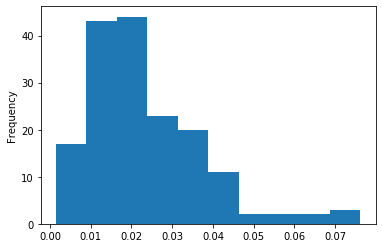

In [51]:
data_final[0].plot.hist()

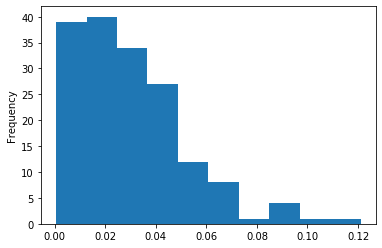

In [52]:
data_final[1].plot.hist()

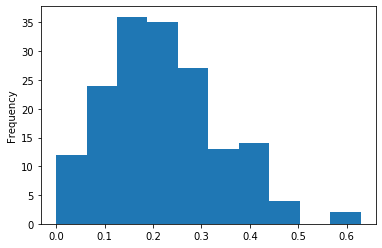

In [53]:
data_final[42].plot.hist()

In [59]:
x=data_final.iloc[:,0:-1]

In [60]:
x.shape

(167, 60)

In [61]:
y=data_final.iloc[:,-1]

In [80]:
y.shape

(167,)

In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [79]:
lg=LogisticRegression()
max_accuracy_score=0

In [104]:
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    ac_scr=accuracy_score(y_test,pred)
    print('accuracy score corresponding to random state',r_state," is ",ac_scr)
    if ac_scr>max_accuracy_score:
        max_accuracy_score=ac_scr
        final_r_state=r_state
        

print('max accuracy score corresponding to ', final_r_state," is ",max_accuracy_score)
   
    

accuracy score corresponding to random state 42  is  0.9705882352941176
accuracy score corresponding to random state 43  is  0.7058823529411765
accuracy score corresponding to random state 44  is  0.7941176470588235
accuracy score corresponding to random state 45  is  0.7058823529411765
accuracy score corresponding to random state 46  is  0.7647058823529411
accuracy score corresponding to random state 47  is  0.7647058823529411
accuracy score corresponding to random state 48  is  0.7647058823529411
accuracy score corresponding to random state 49  is  0.7352941176470589
accuracy score corresponding to random state 50  is  0.8235294117647058
accuracy score corresponding to random state 51  is  0.7352941176470589
accuracy score corresponding to random state 52  is  0.8235294117647058
accuracy score corresponding to random state 53  is  0.8823529411764706
accuracy score corresponding to random state 54  is  0.7647058823529411
accuracy score corresponding to random state 55  is  0.794117647

In [105]:
from sklearn.model_selection import cross_val_score
lg_score=cross_val_score(lg,x,y,cv=5).mean()
print(lg_score)

0.7193181818181819


In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)


In [93]:
accuracy_score(y_test,pred)

0.9705882352941176

In [94]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,pred)

array([[14,  0],
       [ 1, 19]], dtype=int64)

In [95]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.97        14\n           1       1.00      0.95      0.97        20\n\n    accuracy                           0.97        34\n   macro avg       0.97      0.97      0.97        34\nweighted avg       0.97      0.97      0.97        34\n'

In [106]:
from sklearn.externals import joblib
joblib.dump(lg,'lg_sonar.pkl')

['lg_sonar.pkl']